In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [18]:
#Create Data Frame for test and train data given in csv file
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [19]:
#Check train Data
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [20]:
train.shape

(1168, 81)

In [21]:
#Check Test Data
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

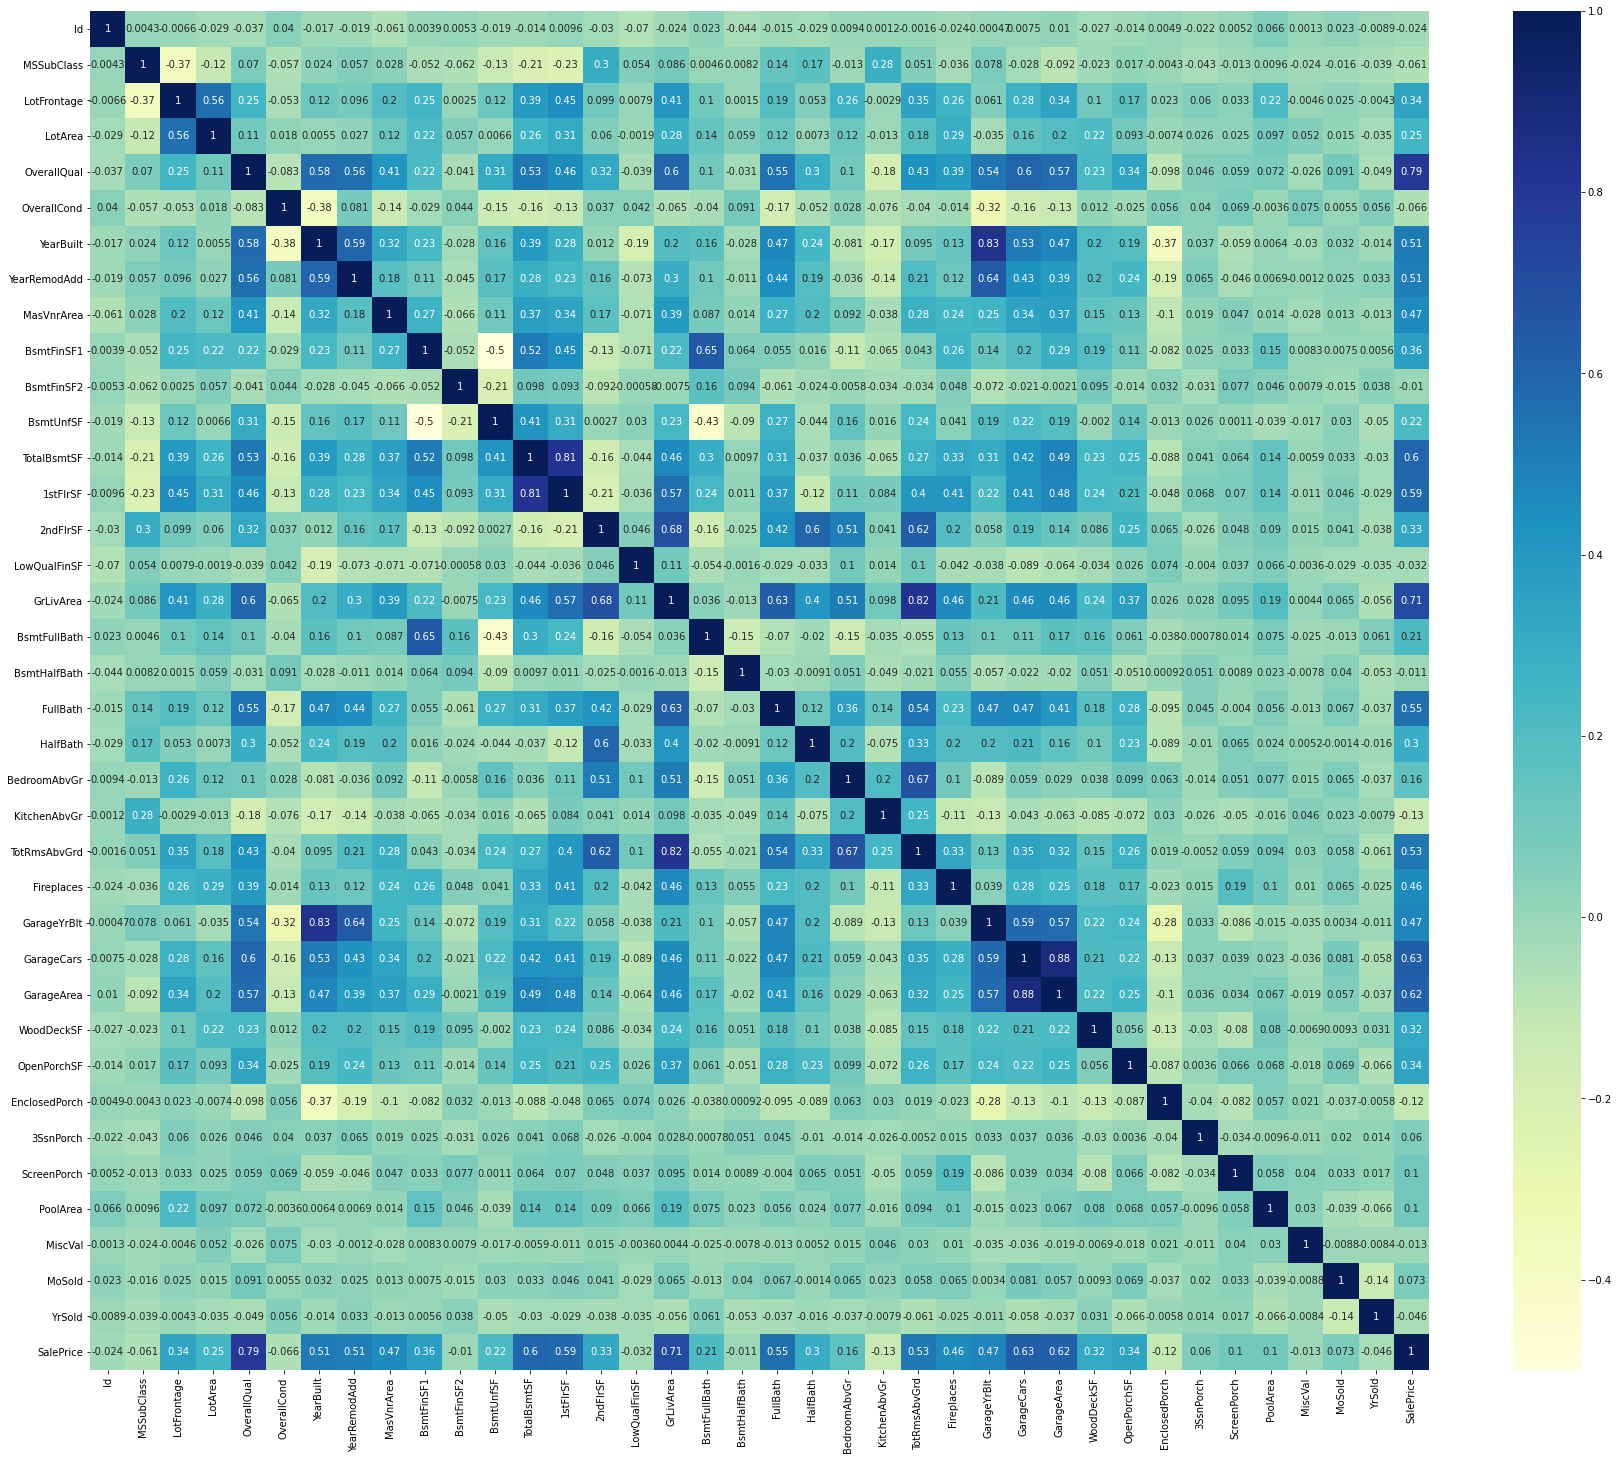

In [22]:
#Heat map of data correlation matrix
plt.figure(figsize = (30, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Multiple Features are correlated with Sale Price i.e. OverallQual YearBuld, YearRemodAdd, GrLiveArea, GarageCars GarageArea, TotalBsmntSF.

<AxesSubplot:>

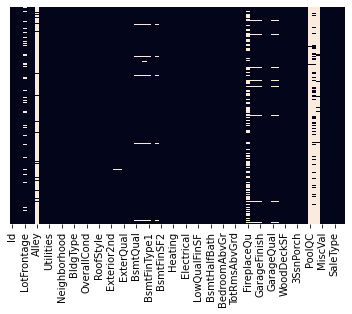

In [23]:
#Check for null/NaN value in Dataset
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

Multiple Feature has null values, we will check how many null/NaN cound exist in each feature, depending on count we will decide whethere  Feature need to be Imputed or we need to remove them.

In [24]:
#Count of Null Values in train Data set
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Alley, FireplaceQu, PoolQC, Fence, MiscFeature has hish number of missing values.

In [25]:
#Describe Numberical values in Train Dataset
train.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

From the table above, we can see, for example, that the average lot area of the houses in our dataset is 10,147.92 ft2 with a standard deviation of 7,880.02 ft2. We can see also that the minimum lot area is 1,300 ft2 and the maximum lot area is 215,245 ft2 with a median of 9,436.5 ft2. Similarly, we can get a lot of information about our dataset variables from the table.

In [26]:
#Get Numberical and Catagorical feature
numaric_cols = train.select_dtypes(exclude=['object'])
categorical_cols = train.select_dtypes(include=['object'])

In [27]:
#finding important features in Numerical Dataset
correlation_num = numaric_cols.corr()
correlation_num.sort_values(["SalePrice"], ascending = False, inplace = True)
correlation_num.SalePrice

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePr

In [28]:
#label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
cat_le = categorical_cols.apply(LabelEncoder().fit_transform)
cat_le['SalePrice'] = train['SalePrice']

#finding important features from categorical values
correlation_cat = cat_le.corr()
correlation_cat.sort_values(["SalePrice"], ascending = False, inplace = True)
correlation_cat.SalePrice

SalePrice        1.000000
Foundation       0.374169
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
Fence            0.143922
Alley            0.136664
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
Exterior2nd      0.097541
MiscFeature      0.067696
Street           0.044753
Condition2       0.033956
LandContour      0.032836
GarageCond       0.023187
MasVnrType       0.022340
LandSlope        0.015485
BsmtCond         0.012224
BsmtFinType2     0.007464
GarageQual      -0.010948
SaleType        -0.050851
LotConfig       -0.060452
BldgType        -0.066028
Heating         -0.100021
BsmtFinType1    -0.103033
MSZoning        -0.133221
PoolQC          -0.141136
LotShape        -0.248171
BsmtExposure    -0.282480
HeatingQC       -0.406604
GarageType      -0.415370
FireplaceQu 

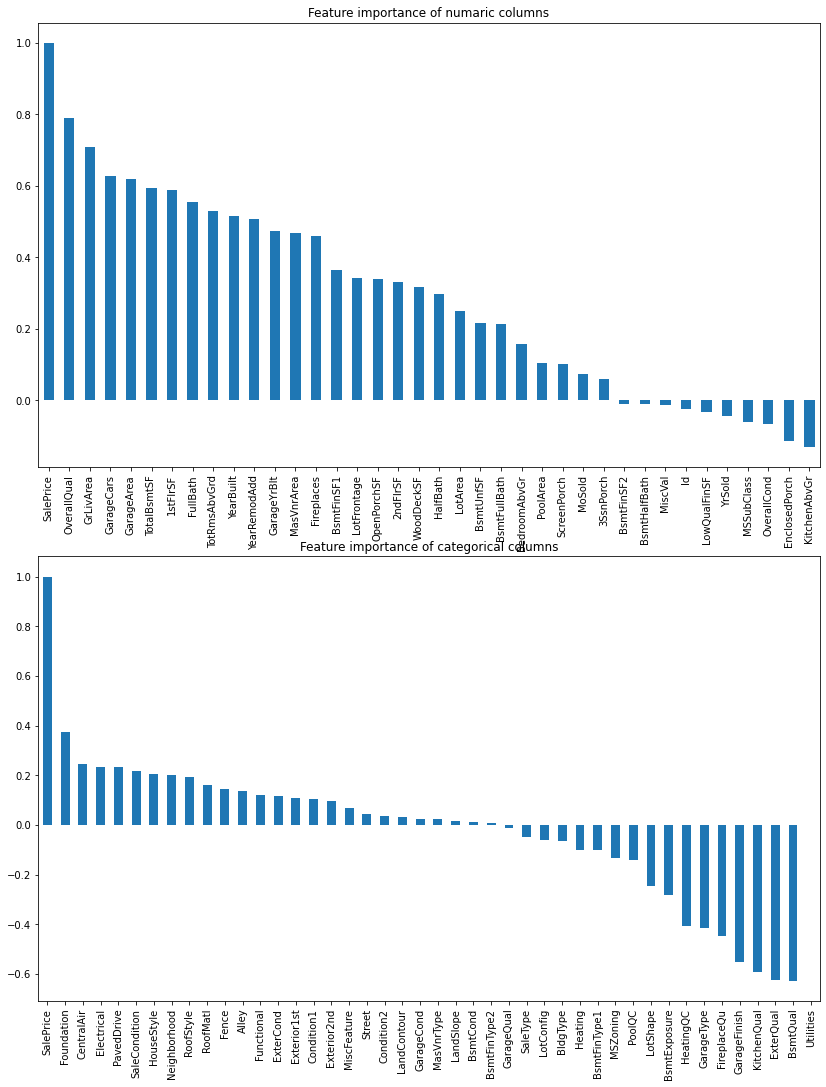

In [29]:
#Sales Price Correlation with other feature, it will prot that bar graph as per their correlation value with Sales Price for Catagorical and Numerical value
fig, axarr = plt.subplots(2, 1, figsize = (14, 18))
correlation_num.SalePrice.plot.bar(ax=axarr[0])
correlation_cat.SalePrice.plot.bar(ax=axarr[1])
axarr[0].set_title("Feature importance of numaric columns")
axarr[1].set_title("Feature importance of categorical columns");

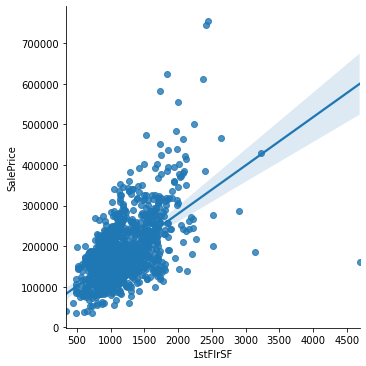

In [30]:
#Bi-Varient Analysis for some features which are highly correlated with Sales Prices
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train) # 1stFlrSF seems very corelated with SalePrice.

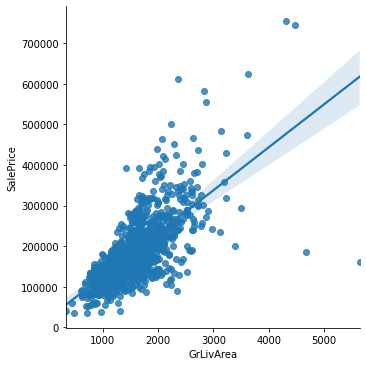

In [31]:
#Bi-Varient Analysis for some features which are highly correlated with Sales Prices
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

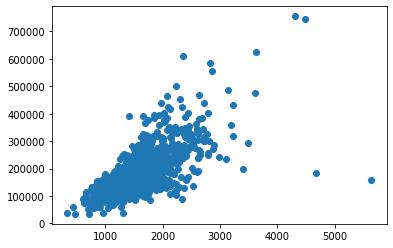

In [32]:
#Bi-Varient Analysis for some features which are highly correlated with Sales Prices
plt.scatter(x= 'GrLivArea', y='SalePrice', data = train)

In [33]:
# dropping colmuns where number of null values is greater than 500
null_values = train.loc[:,train.isnull().sum()>500]
null_values 

Alley FireplaceQu PoolQC  Fence MiscFeature
0      NaN          TA    NaN    NaN         NaN
1      NaN          TA    NaN    NaN         NaN
2      NaN          TA    NaN    NaN         NaN
3      NaN          TA    NaN  MnPrv         NaN
4      NaN          TA    NaN    NaN         NaN
...    ...         ...    ...    ...         ...
1163   NaN         NaN    NaN  MnPrv         NaN
1164   NaN         NaN    NaN  MnPrv         NaN
1165   NaN          TA    NaN    NaN         NaN
1166  Pave         NaN    NaN  MnPrv         NaN
1167   NaN          Gd    NaN    NaN         NaN

[1168 rows x 5 columns]

In [34]:
train.drop(null_values,axis=1, inplace = True)

In [35]:
# list of less important features we got from correlation matrices and plot
less_important = ['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
 '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure','BsmtFinType1',
 'Heating', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish','SaleType']

# dropping less important columns
train.drop(less_important, axis = 1, inplace = True)

In [36]:
#check count of feature having Null value, will impute these value on the basis of values and feature type.
pd.set_option('display.max_rows', None)
pd.DataFrame(train.isna().sum())

0
LotFrontage    214
LotArea          0
Neighborhood     0
Condition1       0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       7
ExterCond        0
Foundation       0
BsmtCond        30
BsmtFinSF1       0
BsmtFinType2    31
BsmtUnfSF        0
TotalBsmtSF      0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageYrBlt     64
GarageCars       0
GarageArea       0
GarageQual      64
GarageCond      64
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
ScreenPorch      0
SaleCondition    0
SalePrice        0

In [37]:
# filling null values
#Replace NaN value with mean for LotFrontage feature
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
#Replace Nan value with 0 for MasVnrArea.
train['MasVnrArea'].fillna(0 , inplace = True)
#Replace NaN value with 'NA' for BsmtCond feature
train['BsmtCond'].fillna('NA' , inplace = True)
#Replace NaN value with 'NA' for BsmtFinType2 feature
train['BsmtFinType2'].fillna('NA' , inplace = True)
#Replace NaN value with 'SBrkr' for Electrical feature
train['Electrical'].fillna('SBrkr' , inplace = True)
#Replace Nan value with 0 for GarageYrBlt.
train['GarageYrBlt'].fillna(0 , inplace = True)
#Replace NaN value with 'NA' for GarageQual feature
train['GarageQual'].fillna('NA' , inplace = True)
#Replace NaN value with 'NA' for GarageCond feature
train['GarageCond'].fillna('NA' , inplace = True)

<AxesSubplot:>

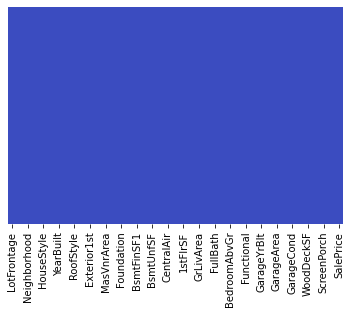

In [38]:
#Check for Null/NaN value in train data set after replacing NaN value using HeatMap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

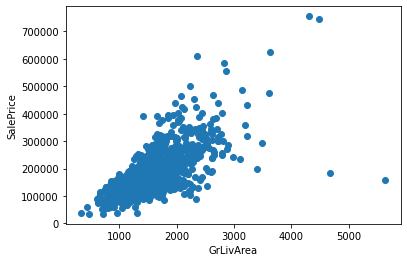

In [39]:
#Bi Barient analysis for SalePrice and other features.
plt.scatter(train.GrLivArea, train.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

There are some odd values that saying Ground living area is bigger than 4000. We will treat them as outliers.

In [40]:
#removing outliers ,outlier are thoese value which is more then 4000 for Ground living Area
train = train[train.GrLivArea < 4000]

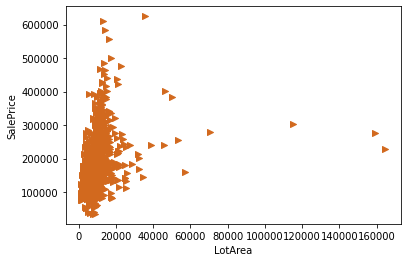

In [41]:
plt.scatter(train.LotArea, train.SalePrice, c = "chocolate", marker =">")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

We will consider LotArea greater than 150000 as outliers.

In [42]:
#removing outliers
train = train[train.LotArea < 150000]

Another scatter plot of LotFrontage w.r.t SalePrice

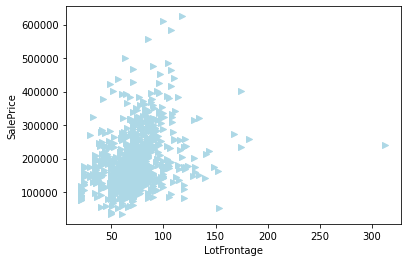

In [43]:
plt.scatter(train.LotFrontage, train.SalePrice, c = "lightblue", marker =">")
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

OverallQual refers overall quality of the house. This is a important feature. SalePrice largly depends on it. Because if the house quality is Very Excellent than it is more likely to be sold with high price. Let's analyse this column.

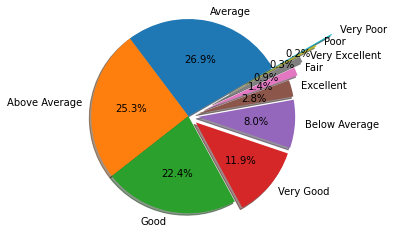

In [44]:
#Plot PI chart for OverallQual feature,
labels = 'Average', 'Above Average', 'Good', 'Very Good', 'Below Average','Excellent', 'Fair', 'Very Excellent', 'Poor', 'Very Poor' 
explode = (0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.5, 0.7)

fig1, ax1 = plt.subplots()
ax1.pie(train['OverallQual'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
plt.show()

27.3% houses of the train dataset has Average quality. And 0.1% houses are Very Poor in quality.

Let's see the SalePrice variation w.r.t OverallQual

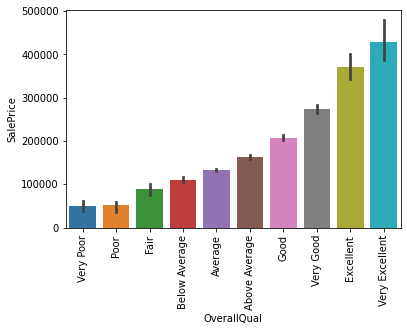

In [45]:
fig = sns.barplot(x = 'OverallQual',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent'], rotation=90);

Foundation is another important feature. It represent how strong a bulding can be. Buildings life depends on it. So, this column worth analysing.

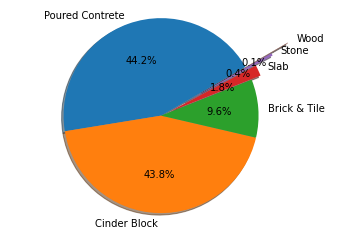

In [46]:
labels = 'Poured Contrete', 'Cinder Block', 'Brick & Tile', 'Slab', 'Stone', 'Wood'
explode = (0, 0.0, 0.0, 0.1, 0.3, 0.5)

fig1, ax1 = plt.subplots()
ax1.pie(train['Foundation'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
plt.show()

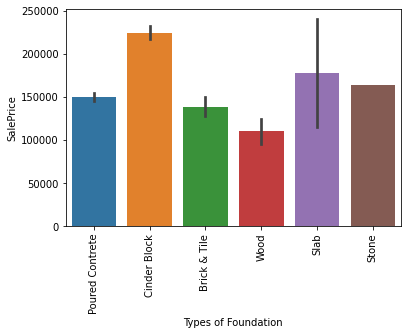

In [47]:
fig = sns.barplot(x = 'Foundation',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['Poured Contrete', 'Cinder Block', 'Brick & Tile', 'Wood', 'Slab', 'Stone'], rotation=90)
plt.xlabel("Types of Foundation");

Let's see how SalePrice varies w.r.t GarageCars

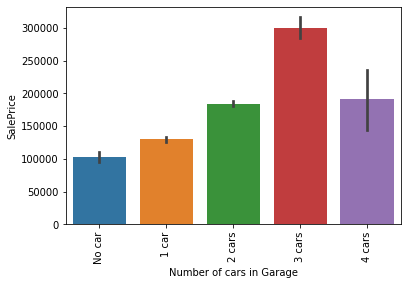

In [48]:
fig = sns.barplot(x = 'GarageCars',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['No car', '1 car', '2 cars', '3 cars', '4 cars'], rotation=90)
plt.xlabel("Number of cars in Garage");

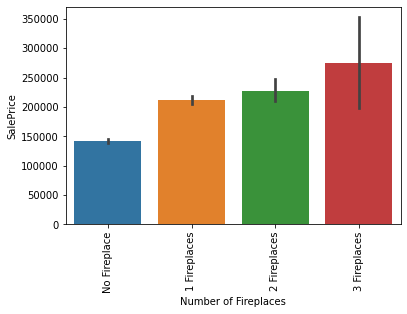

In [49]:
fig = sns.barplot(x = 'Fireplaces',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['No Fireplace', '1 Fireplaces', '2 Fireplaces', '3 Fireplaces'], rotation=90)
plt.xlabel("Number of Fireplaces");

Let's plot a distribution plot of YearBuilt column representing the year of a house was bult w.r.t saleprice

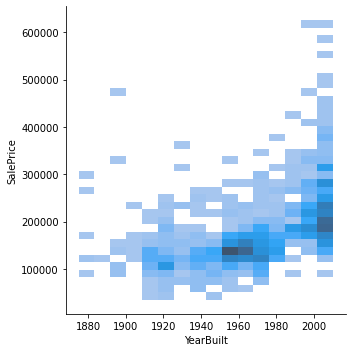

In [50]:
sns.displot(x = 'YearBuilt', y = 'SalePrice', data = train);

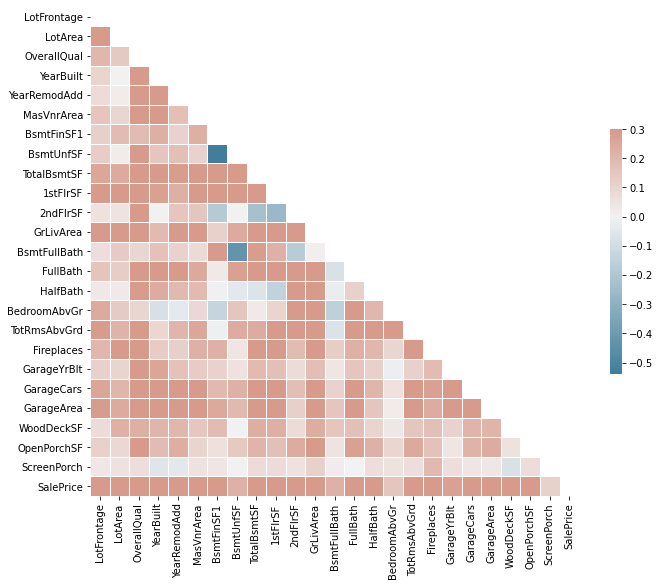

In [51]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Feature Engineering


Reducing Skewness and kurtosis from data


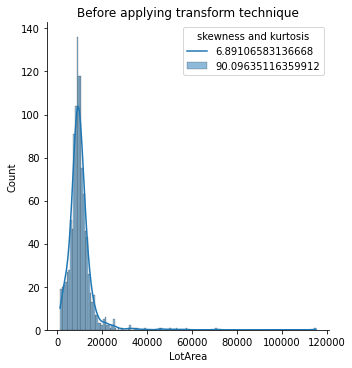

In [52]:
sns.displot(x = 'LotArea', data = train, kde = True)
skewness=str(train["LotArea"].skew())
kurtosis=str(train["LotArea"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Before applying transform technique")
plt.show()

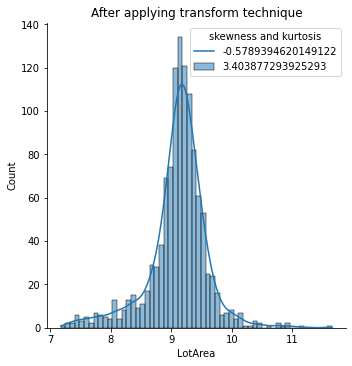

In [53]:
#applying log transform
train['LotArea']=np.log(train['LotArea'])
sns.displot(x = 'LotArea', data = train, kde = True)
skewness=str(train["LotArea"].skew())
kurtosis=str(train["LotArea"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("After applying transform technique")
plt.show()

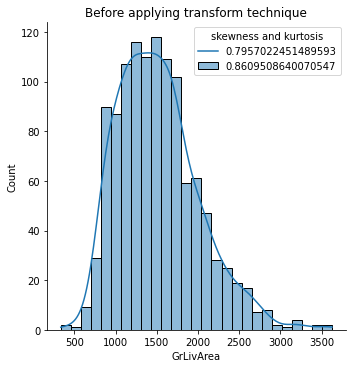

In [54]:
sns.displot(x = 'GrLivArea', data = train, kde = True)
skewness=str(train["GrLivArea"].skew())
kurtosis=str(train["GrLivArea"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Before applying transform technique")
plt.show()

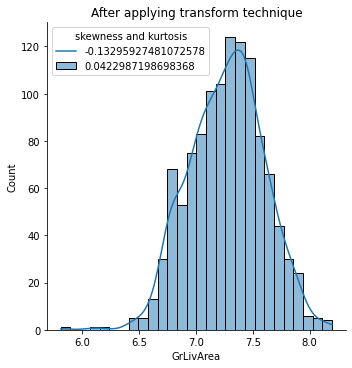

In [55]:
train['GrLivArea']=np.log(train['GrLivArea'])
sns.displot(x = 'GrLivArea', data = train, kde = True)
skewness=str(train["GrLivArea"].skew())
kurtosis=str(train["GrLivArea"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("After applying transform technique")
plt.show()

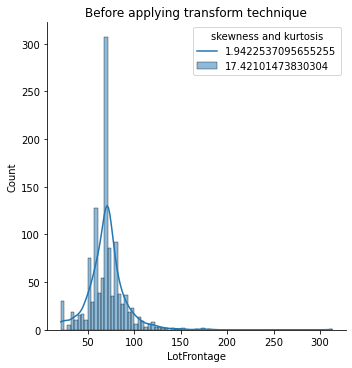

In [56]:
sns.displot(x = 'LotFrontage', data = train, kde = True)
skewness=str(train["LotFrontage"].skew())
kurtosis=str(train["LotFrontage"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Before applying transform technique")
plt.show()

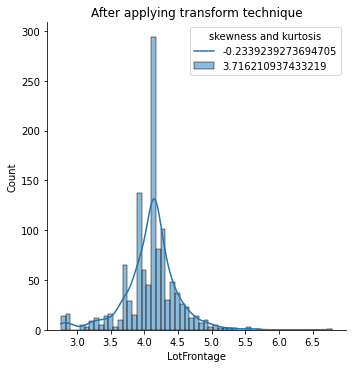

In [57]:
train['LotFrontage'] = np.cbrt(train['LotFrontage'])
sns.displot(x = 'LotFrontage', data = train, kde = True)
skewness=str(train["LotFrontage"].skew())
kurtosis=str(train["LotFrontage"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("After applying transform technique")
plt.show()

### Modeling

It's time to create our independent and dependent matrix of feature.



In [58]:
x = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

In [59]:
#labelencoding categorical variables from x
from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)

In [60]:
x.head()

LotFrontage  LotArea  Neighborhood  Condition1  HouseStyle  OverallQual  \
0           41       80            13           2           2            5   
1           66      807            12           2           2            7   
2           63      449            15           2           5            6   
3           76      632            14           2           2            5   
4           41      820            14           2           2            5   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  ...  GarageYrBlt  GarageCars  \
0         75            26          1         0  ...           64           2   
1         69            20          0         4  ...           57           2   
2         95            47          1         0  ...           84           2   
3         76            27          3         0  ...           64           2   
4         76            50          1         0  ...           64           2   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         117           5           5           2           0          144   
1         247           5           5           2          29          145   
2         128           5           5           2          96          101   
3         199           5           5           2           0           95   
4         187           5           5           2         140            0   

   ScreenPorch  SaleCondition  
0            0              4  
1           48              4  
2            0              4  
3            0              4  
4            0              4  

[5 rows x 42 columns]

In [61]:
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

In [62]:
x.shape, y.shape


((1162, 42), (1162,))

In [63]:
#splitting the dataset into train and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 31)

In [64]:
len(x_train), len(x_test), len(y_train), len(y_test)

(871, 291, 871, 291)

In [65]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [66]:
#model evaluation function
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

def model_evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mae

### Lasso

In [67]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1, random_state = 32).fit(x_train, y_train)
cv_r2 = cross_val_score(lasso_reg, x_train, y_train, cv = 10)
y_preds = lasso_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8301181864233955
R^2 score: 0.8183337044743006
Mean Absolute Erro: 20861.44126093719


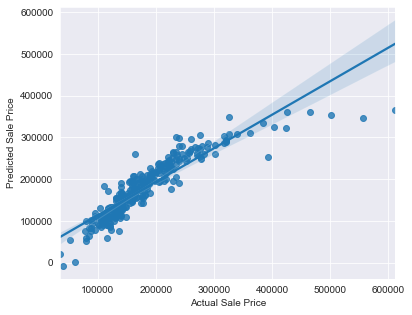

In [68]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,5)) 
sns.regplot(y_test, y_preds)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

### Ridge

In [69]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=.5).fit(x_train, y_train)
cv_r2 = cross_val_score(ridge_reg, x_train, y_train, cv = 10)
y_preds = ridge_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.830175425271141
R^2 score: 0.8183543627933821
Mean Absolute Erro: 20855.534421665845


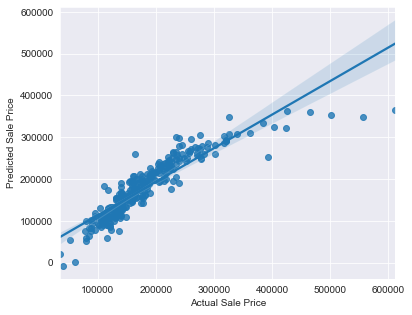

In [70]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,5)) 
sns.regplot(y_test, y_preds)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000).fit(x_train, y_train)
cv_r2 = cross_val_score(rf_reg, x_train, y_train, cv = 10)
y_preds = rf_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8742848097596566
R^2 score: 0.8582601703834036
Mean Absolute Erro: 18046.071580756015


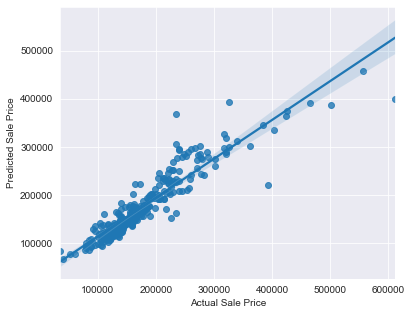

In [72]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,5)) 
sns.regplot(y_test, y_preds)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

### GradientBoostingRegressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=31).fit(x_train, y_train)
cv_r2 = cross_val_score(gbr_reg, x_train, y_train, cv = 10)
y_preds = gbr_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8527220995992032
R^2 score: 0.8468860299695804
Mean Absolute Erro: 19381.640539066


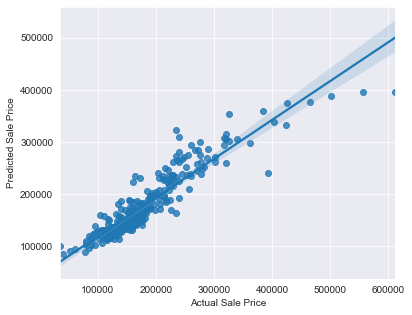

In [74]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,5)) 
sns.regplot(y_test, y_preds)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

### Xgboost

In [75]:
import xgboost as XGB
xgb = XGB.XGBRegressor(learning_rate=0.01, n_estimators=1000, objective='reg:squarederror', random_state = 31).fit(x_train, y_train)
cv_r2 = cross_val_score(xgb, x_train, y_train, cv = 10)
y_preds = xgb.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8781556832738235
R^2 score: 0.8758944723802147
Mean Absolute Erro: 16549.55466065292


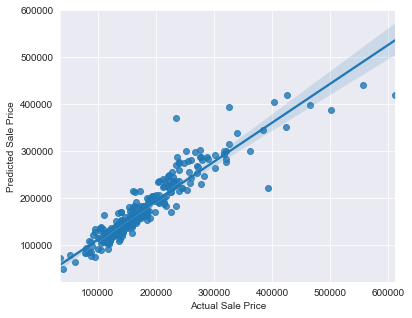

In [76]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,5)) 
sns.regplot(y_test, y_preds)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

#### Highest R2 Score is coming for XGBOOST model, hence this is best model for the house price prediction. We will tune its parameter using hyper parameter tuning.

In [77]:
#XGBoost hyper-parameter tuning
from sklearn.model_selection import GridSearchCV
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGB.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 4)

    gsearch.fit(X_train,y_train)

    print("best_score:",gsearch.best_score_)
    print("best_params:\n",gsearch.best_params_)

In [78]:
hyperParameterTuning(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best_score: 0.8923748619017164
best_params:
 {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.7}


### Preparing test set

In [79]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

Less drop less important featues and columns with null values > 500

In [80]:
#null_values = test.loc[:, test.isnull().sum()>500]

#null_values


In [81]:
test.drop(null_values, axis=1, inplace = True)

In [82]:
test.drop(less_important, axis = 1, inplace = True)

In [83]:
test.shape

(292, 42)

In [84]:
#checking for null values in test set
pd.DataFrame(test.isna().sum())

0
LotFrontage    45
LotArea         0
Neighborhood    0
Condition1      0
HouseStyle      0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrArea      1
ExterCond       0
Foundation      0
BsmtCond        7
BsmtFinSF1      0
BsmtFinType2    7
BsmtUnfSF       0
TotalBsmtSF     0
CentralAir      0
Electrical      1
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
GarageYrBlt    17
GarageCars      0
GarageArea      0
GarageQual     17
GarageCond     17
PavedDrive      0
WoodDeckSF      0
OpenPorchSF     0
ScreenPorch     0
SaleCondition   0

In [85]:
# taking care of null values
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace = True)
test['MasVnrArea'].fillna(0 , inplace = True)
test['BsmtCond'].fillna('NA' , inplace = True)
test['BsmtFinType2'].fillna('NA' , inplace = True)
test['Electrical'].fillna('SBrkr' , inplace = True)
test['GarageYrBlt'].fillna(0 , inplace = True)
test['GarageQual'].fillna('NA' , inplace = True)
test['GarageCond'].fillna('NA' , inplace = True)
test['Exterior1st'].fillna('VinylSd' , inplace = True)
test['Exterior2nd'].fillna('VinylSd' , inplace = True)
test['BsmtFinSF1'].fillna(0 , inplace = True)
test['BsmtUnfSF'].fillna(0 , inplace = True)
test['TotalBsmtSF'].fillna(0 , inplace = True)
test['BsmtFullBath'].fillna(0 , inplace = True)
test['Functional'].fillna('Typ' , inplace = True)
test['GarageCars'].fillna(0 , inplace = True)
test['GarageArea'].fillna(0, inplace = True)

In [86]:
#reducing Skewness and kurtosis
test['LotFrontage'] = np.cbrt(test['LotFrontage'])
test['GrLivArea']=np.log(test['GrLivArea'])
test['LotArea']=np.log(test['LotArea'])

In [87]:
#labelencoding test data
test = test.apply(LabelEncoder().fit_transform)

In [88]:
#scaling test data
test = scale.transform(test)

In [94]:
#Using Tunned parameters
xgb = XGB.XGBRegressor(colsample_bytree= 0.5, learning_rate= 0.1, max_depth=3, min_child_weight= 3, n_estimators=200, objective= 'reg:squarederror', subsample= 0.7).fit(x_train, y_train)
cv_r2 = cross_val_score(xgb, x_train, y_train, cv = 10)
y_preds = xgb.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))


Cross val score: 0.8880168350337188
R^2 score: 0.9025005052935338
Mean Absolute Erro: 15471.184654209623


In [99]:
#Saving Best Model

import joblib 
joblib.dump(xgb,'house-Price-Prediction.pki')

['house-Price-Prediction.pki']

In [100]:
model = joblib.load('house-Price-Prediction.pki')

In [101]:
prediction = model.predict(test)

In [103]:
SalePrice = pd.DataFrame(prediction.round(0).astype(int))
SalePrice

0
0    172216
1    119600
2    144103
3    110415
4    118452
5     53097
6    117677
7    150905
8    137405
9    107268
10    53239
11    94314
12    81280
13   124937
14   145355
15    92123
16    77503
17    89162
18   109877
19   120663
20    86182
21    98190
22   110606
23    41643
24    53791
25    88182
26   112187
27    94948
28   111459
29    69621
30    94337
31   133639
32   127021
33   117289
34    67325
35   117782
36   110130
37    75910
38   102253
39    99607
40    57299
41   147244
42   125118
43   119203
44    97439
45    91511
46    85734
47    76512
48   129096
49   175114
50   114855
51   128207
52    71820
53    63948
54   121038
55    90907
56   111099
57   118339
58    80387
59   145546
60    74842
61   114157
62    91983
63   100635
64   129161
65    66504
66   124546
67   125367
68    98708
69    96143
70   143764
71   100583
72   113028
73    95839
74   115398
75   126858
76   155139
77   128088
78   155534
79   113856
80   130515
81    89488
82    93787
83   108552
84   114137
85   132335
86    78225
87   152039
88    92009
89   113046
90   125478
91    91663
92    87376
93    89555
94   117711
95   109847
96   135853
97   111776
98   152074
99    95698
100  148759
101   72161
102   85538
103  101337
104  115944
105  104265
106  140410
107   97257
108  121169
109  129781
110  128870
111   97818
112  112385
113  140977
114   79843
115   63501
116   94959
117  124645
118  106218
119   61295
120   85393
121  117315
122  129477
123   81193
124  106930
125  123936
126   78571
127  115056
128   80434
129   71028
130  109670
131  125917
132  111243
133  102766
134  102015
135  160573
136  124964
137   84228
138  152451
139   86935
140   97616
141  158893
142   66055
143  167315
144  129696
145  134910
146  104706
147   73602
148   71835
149  127119
150   98877
151   99418
152  123668
153   76841
154   75566
155  116702
156  116700
157  100574
158   98042
159  102627
160  120792
161  102789
162  130508
163  100333
164   75465
165  145346
166  110501
167  126843
168   87250
169  134814
170  120262
171   76723
172   92600
173  153429
174   95863
175  159506
176   78119
177   66671
178  103608
179  107871
180  135652
181  119839
182  142472
183  101049
184  202003
185  172069
186  134944
187   50378
188  100612
189   90168
190   70402
191  129288
192  130792
193   78543
194  100300
195   65635
196  109134
197  126383
198   82414
199   97169
200  111518
201   79099
202  151857
203  148645
204   97625
205   82007
206  138166
207  108726
208   88790
209  115509
210   60494
211   85948
212  101139
213  110657
214   71408
215   72073
216  103036
217   98019
218   92523
219  116842
220  131117
221  133678
222  147271
223   99063
224  123293
225  163575
226  133830
227   73306
228  171397
229  114137
230   80886
231  119167
232   50271
233  105782
234   82666
235  133389
236  109848
237  123921
238  143672
239  116747
240  134025
241  105656
242  140782
243   82508
244  106170
245  121467
246  119669
247  143931
248   86748
249   90714
250  103932
251  138943
252   93423
253   72919
254   70322
255  124448
256   86004
257  168849
258  128041
259   74153
260  115356
261  124747
262   65530
263   92771
264  117474
265  101457
266   74522
267  107848
268  141676
269  138120
270  102838
271   88598
272  190069
273  142411
274  156667
275  130709
276  110423
277   80280
278  119119
279  166580
280   92979
281  168993
282   95220
283  144780
284  118134
285   96328
286  117068
287  141508
288  104613
289  105685
290  118261
291   60975

In [104]:
#Save value in CSV file
SalePrice.to_csv('SalePrice.csv')